In [51]:
import re
from pathlib import Path

import tqdm
import pandas as pd
import geopandas as gpd

import networkx as nx

import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['default', 'science', 'no-latex'])

In [52]:
def load_dataset(city):
    
    from utils.load_data import load_metro_station_list
    
    data_folder = Path.cwd().parent / city
    
    # Load metro station list
    path = data_folder / f'metro_network_{city}.xlsx'
    data = load_metro_station_list(path, time_status='current')
    # drop duplicates
    # data = data.drop_duplicates(subset=['line_name', 'name'])
    # Select date
    data = data[data['opening_date'] <= '2024-06-30']
    # assign station id
    data = data.assign(station_id = lambda x : range(x.shape[0]))
    
    return data
# =============================================================================

In [53]:
data_sz = load_dataset('suzhou')
print('\nShape of station list data:', data_sz.shape,
      '\nShape of data after removing duplicates:', data_sz.drop_duplicates(subset=['line_name', 'name']).shape,
      '\nNumber of NA values:', data_sz.isna().sum().sum())


data_sh = load_dataset('shanghai')
print('\nShape of station list data:', data_sh.shape,
      '\nShape of data after removing duplicates:', data_sh.drop_duplicates(subset=['line_name', 'name']).shape,
      '\nNumber of NA values:', data_sh.isna().sum().sum())


path = Path.cwd().parent / 'suzhou/boundary/boundary_gcj02.shp'
boundary_sz = gpd.read_file(path) \
    .query('admin_leve == "6"')


path = Path.cwd().parent / 'shanghai/boundary/boundary_gcj02.shp'
boundary_sh = gpd.read_file(path) \
    .query('admin_leve == "6"')

Loading data: 8it [00:00, 21.25it/s]



Shape of station list data: (228, 14) 
Shape of data after removing duplicates: (228, 14) 
Number of NA values: 408


Loading data: 22it [00:02,  9.84it/s]


Shape of station list data: (517, 14) 
Shape of data after removing duplicates: (517, 14) 
Number of NA values: 0


['Line 1', 'Line 2', 'Line 3', 'Line 4', 'Line 5', 'Line 5b', 'Line 6', 'Line 7', 'Line 8', 'Line 9', 'Line 10', 'Line 10b', 'Line 11', 'Line 11b', 'Line 12', 'Line 13', 'Line 14', 'Line 15', 'Line 16', 'Line 17', 'Line 18', 'Pujiang']
['Line 1', 'Line 1', 'Line 2', 'Line 2', 'Line 3', 'Line 3', 'Line 4', 'Line 4', 'Line 4b', 'Line 5', 'Line 5b', 'Line 5', 'Line 6', 'Line 6', 'Line 7', 'Line 8', 'Line 9', 'Line 10', 'Line 10b', 'Line 11', 'Line 11b', 'Line 11', 'Line 12', 'Line 13', 'Line 14', 'Line 15', 'Line 16', 'Line 17', 'Line 18', 'Pujiang']


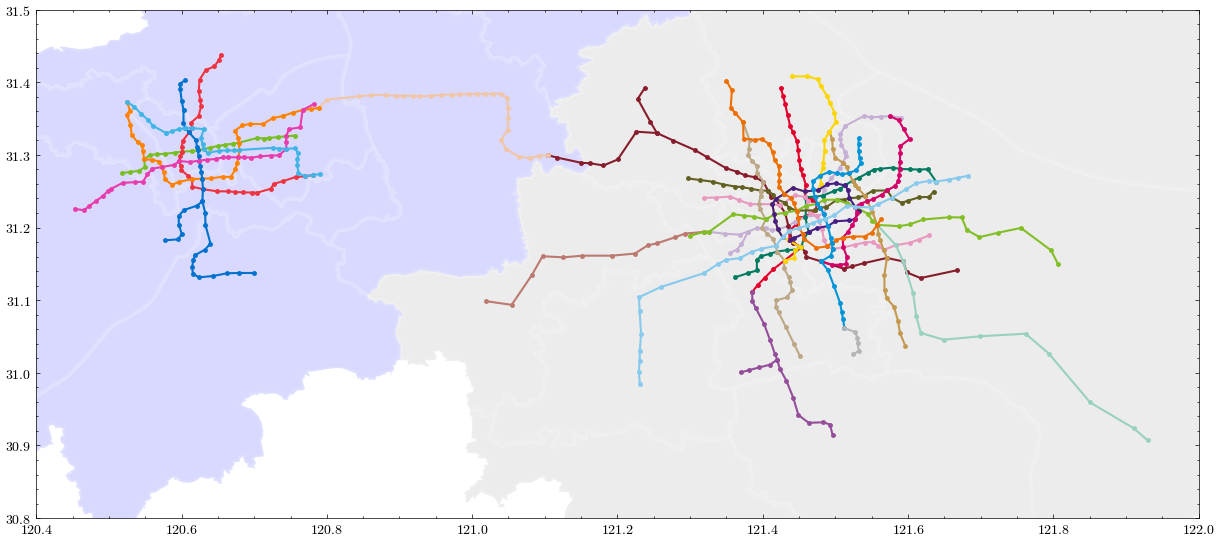

In [66]:
from codes.utils.plot_metro_network import (
    plot_metro_network_integrate_from_dataframe,
    plot_metro_network_separate_from_dataframe)


fig, ax = plt.subplots(1, 1, figsize = (15, 15))

ax = boundary_sh.plot(ax=ax, edgecolor='white', lw=3, facecolor='grey', alpha=0.15)
ax = boundary_sz.plot(ax=ax, edgecolor='white', lw=3, facecolor='blue', alpha=0.15)

ax = plot_metro_network_integrate_from_dataframe(
    data_sh, x_col='x_gcj02', y_col='y_gcj02',
    line_kwargs={'lw': 1.5, 'markersize': 5},
    ax=ax)

ax = plot_metro_network_integrate_from_dataframe(
    data_sz, x_col='x_gcj02', y_col='y_gcj02',
    line_kwargs={'lw': 1.5, 'markersize': 5},
    ax=ax)

# remove legend
ax.get_legend().remove()

ax.set_xlim([120.4, 122])
ax.set_ylim([30.8, 31.5])

ax.set_aspect('equal', 'box')

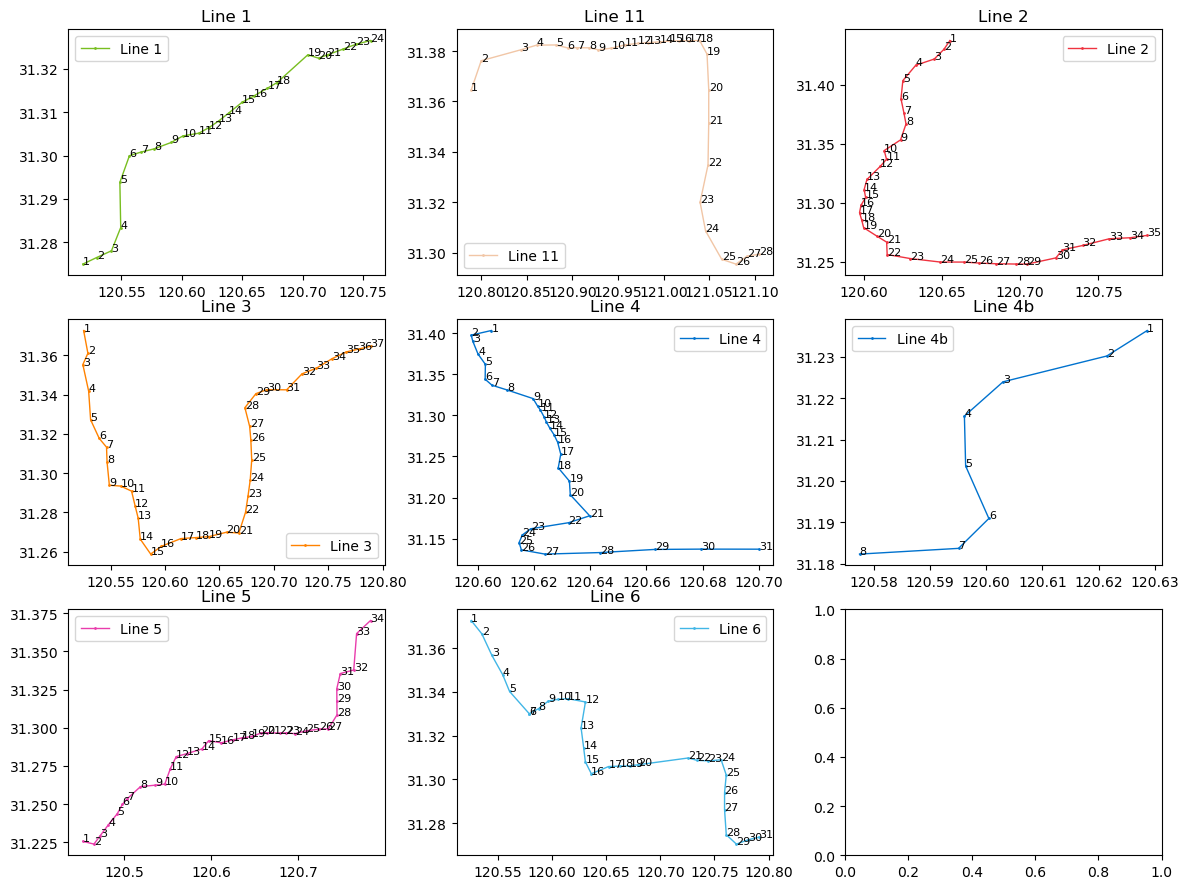

In [15]:
plot_metro_network_separate_from_dataframe(
    data, x_col='x_gcj02', y_col='y_gcj02',
    shared_axis=False, plot_background=False,
    line_kwargs={'lw': 1, 'markersize': 1})